In [1]:
import numpy as np
from hipposlam.utils import read_pickle
from hipposlam.sequences import Sequences
from hipposlam.comput_utils import MLM
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm


In [2]:


project_tag = 'Avoidance'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'ratemaps')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
metadata['seqR'] = 5 # For now. Remove this line next time after seqR is stored in the metadata
metadata['seqL'] = 10 # For now. Remove this line next time after seqL is stored in the metadata
seqR = metadata['seqR']
seqL = metadata['seqL']
fkey2id_dict = metadata['stored_f']
id2fkey_dict = {val:key for key, val in fkey2id_dict.items()}

f_pos = metadata['fpos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
trajdf['a'] = trajdf['rota'] * trajdf['rotz']
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  196


t         x         y         z          rotx      roty  \
0          128  4.680020  2.807367  0.061624 -1.579231e-03 -0.001579   
1          256  4.678977  2.754858  0.058151 -1.903525e-03 -0.001798   
2          384  4.678577  2.701075  0.058773 -7.499675e-04 -0.000738   
3          512  4.678619  2.646312  0.059026 -3.263218e-04 -0.000293   
4          640  4.677918  2.591286  0.059130 -1.425992e-04 -0.000069   
...        ...       ...       ...       ...           ...       ...   
15338  1968384  4.108388 -0.634866  0.059201 -2.580587e-04  0.000066   
15339  1968512  4.156990 -0.614649  0.059201 -2.533233e-04  0.000073   
15340  1968640  4.205974 -0.593832  0.059201 -1.015182e-04  0.000090   
15341  1968768  4.256237 -0.573071  0.059201  5.461929e-07  0.000191   
15342  1968896  4.307002 -0.552334  0.059201  2.073108e-05  0.000133   

           rotz      rota                                         objID  \
0     -0.999998  1.570826                                            []   
1     -0.999997  1.580309             [2640, 5543, 15573, 15699, 17158]   
2     -0.999999  1.594632             [2640, 5543, 15573, 15699, 17158]   
3     -1.000000  1.613886              [2640, 2717, 5543, 15573, 17158]   
4     -1.000000  1.635931  [1632, 1856, 2640, 2717, 5543, 15573, 17158]   
...         ...       ...                                           ...   
15338 -1.000000 -0.396684      [1856, 5543, 14472, 15573, 15615, 15797]   
15339 -1.000000 -0.403152      [1856, 5543, 14472, 15573, 15615, 15797]   
15340 -1.000000 -0.398917      [1856, 5543, 14472, 15573, 15615, 15797]   
15341 -1.000000 -0.393958      [1856, 5543, 14472, 15573, 15615, 15797]   
15342 -1.000000 -0.386810            [5543, 14472, 15573, 15615, 15797]   

                                              objID_dist  \
0                                                     []   
1            [2640_2, 5543_1, 15573_2, 15699_1, 17158_1]   
2            [2640_2, 5543_1, 15573_2, 15699_1, 17158_1]   
3             [2640_2, 2717_1, 5543_1, 15573_2, 17158_1]   
4      [1632_2, 1856_2, 2640_2, 2717_1, 5543_1, 15573...   
...                                                  ...   
15338  [1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...   
15339  [1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...   
15340  [1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...   
15341  [1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...   
15342       [5543_1, 14472_1, 15573_1, 15615_1, 15797_0]   

                                                 f_sigma  \
0                                                     {}   
1      {'2640_2': [1], '5543_1': [1], '15573_2': [1],...   
2      {'2640_2': [2], '5543_1': [2], '15573_2': [2],...   
3      {'2640_2': [3], '5543_1': [3], '15573_2': [3],...   
4      {'2640_2': [4], '5543_1': [4], '15573_2': [4],...   
...                                                  ...   
15338  {'2640_2': [], '5543_1': [], '15573_2': [], '1...   
15339  {'2640_2': [], '5543_1': [], '15573_2': [], '1...   
15340  {'2640_2': [], '5543_1': [], '15573_2': [], '1...   
15341  {'2640_2': [], '5543_1': [], '15573_2': [], '1...   
15342  {'2640_2': [], '5543_1': [], '15573_2': [], '1...   

                                                       X  X_Nrow         a  
0                                                     []       0 -1.570822  
1      [[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...       5 -1.580304  
2      [[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [...       5 -1.594631  
3      [[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...       6 -1.613886  
4      [[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [...       8 -1.635931  
...                                                  ...     ...       ...  
15338  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...     196  0.396684  
15339  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...     196  0.403152  
15340  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...     196  0.398917  
15341  [[0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
from scipy.ndimage import gaussian_filter
from hipposlam.comput_utils import divide_ignore, midedges



class BayesianDecoder:
    def __init__(self, xmin, xmax, ymin, ymax, amin, amax, dp, da, bodysd):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.amin = amin
        self.amax = amax
        self.dp = dp
        self.da = da
        self.bodysd = bodysd
        self.bodysd_ind = self.bodysd/self.dp
        self.xedges = np.arange(xmin, xmax+dp, dp)
        self.yedges = np.arange(ymin, ymax+dp, dp)
        self.aedges = np.arange(-np.pi, np.pi+da, da)
        self.xedm = midedges(self.xedges)
        self.yedm = midedges(self.yedges)
        self.aedm = midedges(self.aedges)

    def compute_histogram(self, x, y, a):
        data3d = np.stack([x, y, a]).T  # (T, 3)
        H3d, edges3d = np.histogramdd(data3d, bins=[self.xedges, self.yedges, self.aedges])
        return H3d, edges3d

    def compute_spikecounts(self, xsp, ysp):
        H2d, _, _ = np.histogram2d(xsp, ysp, bins=(self.xedges, self.yedges))
        H2d_smooth = gaussian_filter(H2d, sigma=self.bodysd_ind, mode='constant', cval=0)
        return H2d, H2d_smooth

    def compute_directional_occupancy(self, a):
        Ha, _ = np.histogram(a, bins=self.aedges)
        return Ha

    def compute_directional_spikecounts(self, asp):
        Hasp, _ = np.histogram(asp, bins=self.aedges)
        return Hasp

    def compute_ratemap(self, occ, spcounts):
        return divide_ignore(spcounts, occ)



-6.1 6.6 -2.5 4.7


<BarContainer object of 16 artists>

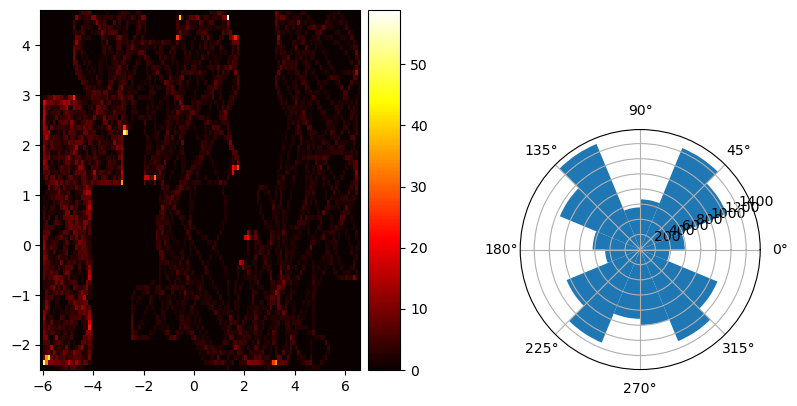

In [4]:
# Compute occpancy
bodysd = 0.15  # body length of the robot = 0.3m
dp = 0.1
da = 2*np.pi/16
xmin = np.floor(trajdf['x'].min() * 10) / 10
xmax = np.ceil(trajdf['x'].max() * 10) / 10
ymin = np.floor(trajdf['y'].min() * 10) / 10
ymax = np.ceil(trajdf['y'].max() * 10) / 10

amin, amax = -np.pi, np.pi

print(xmin, xmax, ymin, ymax)

BD = BayesianDecoder(xmin, xmax, ymin, ymax, amin, amax, dp, da, bodysd)
occ, edges3d = BD.compute_histogram(trajdf['x'].to_numpy(), trajdf['y'].to_numpy(), trajdf['a'].to_numpy())

occ_p = occ.sum(axis=2)
occ_a = occ.sum(axis=0).sum(axis=0)
fig = plt.figure(figsize=(8, 4), facecolor='w')

ax1 = fig.add_axes([0, 0, 0.4, 0.9])
ax2 = fig.add_axes([0.6, 0, 0.3, 0.6], polar=True)
cbar_ax = fig.add_axes([0.41, 0, 0.04, 0.9])

im1 = ax1.pcolormesh(BD.xedges, BD.yedges, occ_p.T, cmap='hot')
cb = fig.colorbar(im1, cax=cbar_ax)
ax2.bar(BD.aedm, occ_a, width=da)





In [5]:
Num_Fnodes = trajdf['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
fposdict = dict()
for i in range(trajdf.shape[0]):

    Xmat = trajdf['X'][i]
    x = trajdf['x'][i]
    y = trajdf['y'][i]
    a = trajdf['a'][i]

    if Xmat.shape[0] < 1:
        continue
    fnode_ids, sigma_ids = Sequences.X2sigma(Xmat, seqR, sigma_state=False)

    for fnode_id, sigma_id in zip(fnode_ids, sigma_ids):
        nodekey = id2fkey_dict[fnode_id]
        ensem_key = '%s-%d'%(nodekey, sigma_id)

        fposdict[ensem_key] = f_pos[nodekey.split('_')[0]]

        if ensem_key in xdict:
            xdict[ensem_key].append(x)
            ydict[ensem_key].append(y)
            adict[ensem_key].append(a)

        else:
            xdict[ensem_key] = [x]
            ydict[ensem_key] = [y]
            adict[ensem_key] = [a]



In [7]:
def MLM(p, d, n, t, minerr=0.01):
    """

    Parameters
    ----------
    p : ndarray
        1-d array with shape (I, ). Firing rate in each position bin i.
    d : ndarray
        1-d array with shape (J, ). Firing rate in each direction bin j.
    n : ndarray
        2-d array with shape (I, J). Number of spike counts in each position and direction bin
    t : ndarray
        2-d array with shape (I, J). Dwell time in each position and direction bin
    minerr : float
        Error tolerance of MLM iteration.
    Returns
    -------

    """
    I, J = p.shape[0], d.shape[0]

    p_out = p.copy()
    d_out = d.copy()
    err = 1000
    i = 0
    while err > minerr:
        if i % 100 == 0:
            print(err)
        p_est = divide_ignore(np.mean(n, axis=1), np.mean(d_out.reshape(1, J) * t, axis=1))
        d_est = divide_ignore(np.mean(n, axis=0), np.mean(p_out.reshape(I, 1) * t, axis=0))

        # error
        errd = np.mean(np.abs(d_est - d_out))
        errp = np.mean(np.abs(p_est - p_out))
        err = errd + errp

        # update
        p_out = p_est
        d_out = d_est

        i += 1

    return p_out, d_out

In [11]:
plot_ratemap = True
plot_dir2 = join('plots', project_tag, 'ratemaps_MLM')
os.makedirs(plot_dir2, exist_ok=True)

num_ensem = len(xdict.keys())
id2ensemkey = [ensem_key for ensem_key in xdict.keys()]
ensemkey2id = dict()
for i, ensem_key in enumerate(id2ensemkey):
    ensemkey2id[ensem_key] = i

all_ratemaps = np.zeros((num_ensem, BD.xedm.shape[0], BD.yedm.shape[0]))

for i in tqdm(range(num_ensem)):
    if i >3:
        break
    ensem_key = id2ensemkey[i]
    xsp = xdict[ensem_key]
    ysp = ydict[ensem_key]
    asp = adict[ensem_key]

    spmap, spmap_gau = BD.compute_spikecounts(xsp, ysp)
    Hsp3d, _ = BD.compute_histogram(xsp, ysp, asp)
    Hsp_p = Hsp3d.sum(axis=2)
    Hsp_a = Hsp3d.sum(axis=0).sum(axis=0)

    ratemap_p = BD.compute_ratemap(occ_p, Hsp_p)
    ratemap_p_gau = gaussian_filter(ratemap_p, sigma=BD.bodysd_ind, mode='constant', cval=0)
    ratemap_a = BD.compute_ratemap(occ_a, Hsp_a)

    MLM_p, MLM_a = MLM(ratemap_p.flatten(), ratemap_a,
                        Hsp3d.reshape(-1, BD.aedm.shape[0]), occ.reshape(-1, BD.aedm.shape[0]), minerr=1)
    MLM_p = MLM_p.reshape(BD.xedm.shape[0], BD.yedm.shape[0])

    MLM_p_gau = gaussian_filter(MLM_p, sigma=BD.bodysd_ind, mode='constant', cval=0)

    fig = plt.figure(figsize=(12, 10), facecolor='w')
    ax1 = fig.add_axes([0, 0, 0.45, 0.45])
    cbar_ax1 = fig.add_axes([0.45, 0, 0.03, 0.45])
    ax2 = fig.add_axes([0.45, 0, 0.45, 0.45], polar=True)

    ax3 = fig.add_axes([0, 0.5, 0.45, 0.45])
    cbar_ax2 = fig.add_axes([0.45, 0.5, 0.03, 0.45])
    ax4 = fig.add_axes([0.45, 0.5, 0.45, 0.45], polar=True)


    im1 = ax1.pcolormesh(BD.xedges, BD.yedges, ratemap_p_gau.T, cmap='hot')
    cb1 = fig.colorbar(im1, cax=cbar_ax1)
    ax2.bar(BD.aedm, ratemap_a, width=da)

    im2 = ax3.pcolormesh(BD.xedges, BD.yedges, MLM_p_gau.T, cmap='hot')
    cb2 = fig.colorbar(im2, cax=cbar_ax2)
    ax4.bar(BD.aedm, MLM_a, width=da)
    ax4.set_title('MLM')

    fig.savefig(join(plot_dir2, '%d.png'%(i)), dpi=200)
    plt.close(fig)

  0%|          | 0/1960 [00:00<?, ?it/s]

1000


  0%|          | 1/1960 [00:00<28:50,  1.13it/s]

1000


  0%|          | 2/1960 [00:01<28:11,  1.16it/s]

1000


  0%|          | 3/1960 [00:02<27:42,  1.18it/s]

1000


  0%|          | 4/1960 [00:04<34:37,  1.06s/it]


In [37]:
ratemap_a.shape

(127, 72)

  1%|          | 11/1960 [00:05<14:47,  2.20it/s]


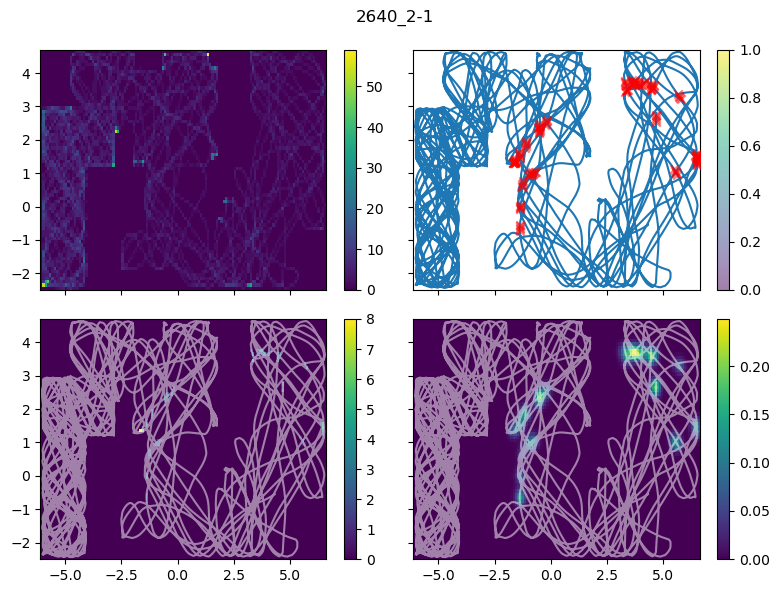

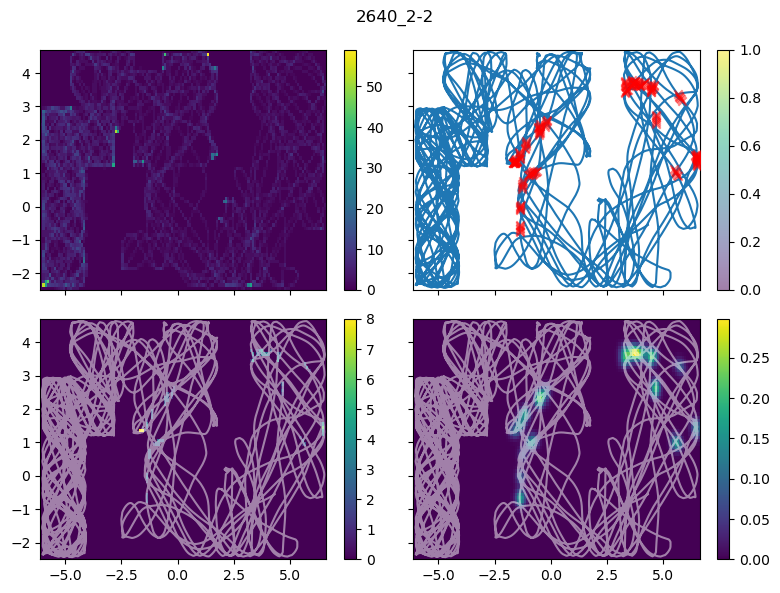

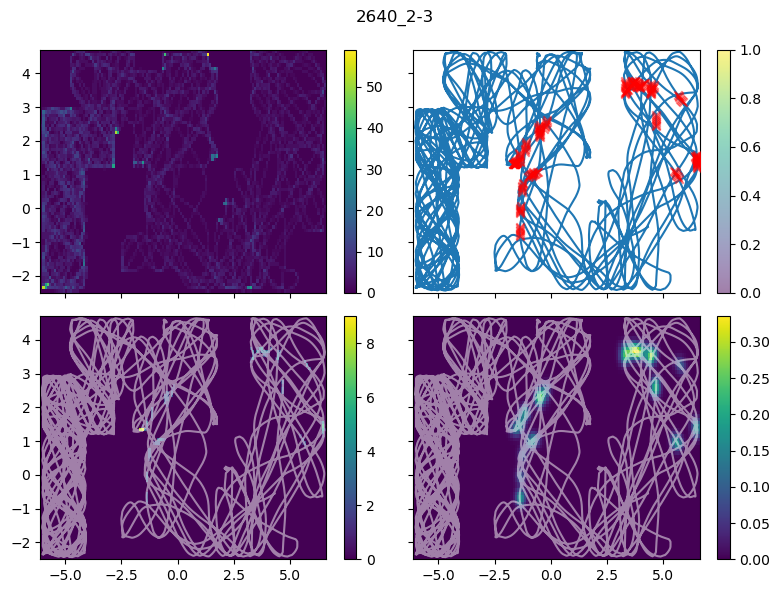

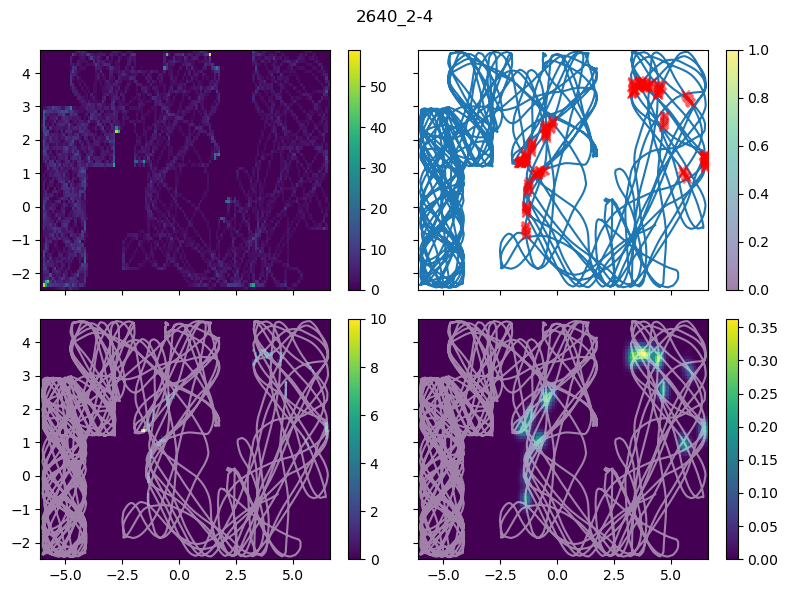

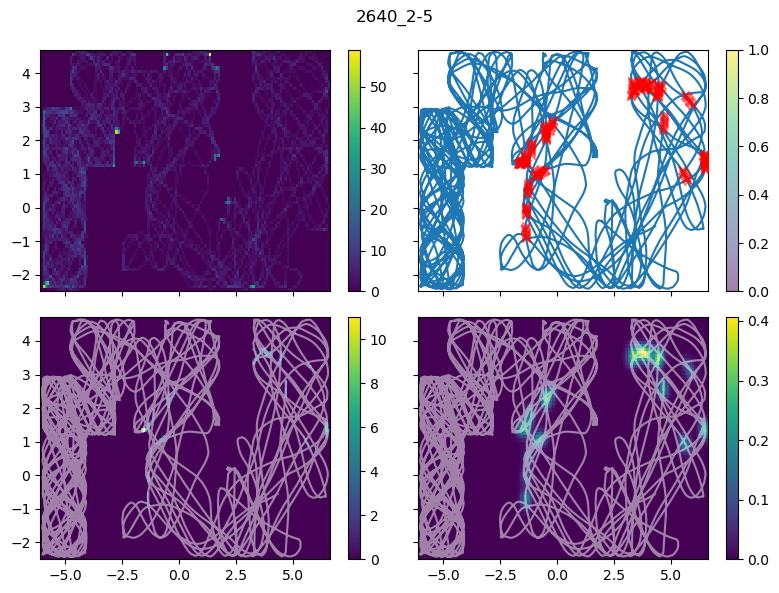

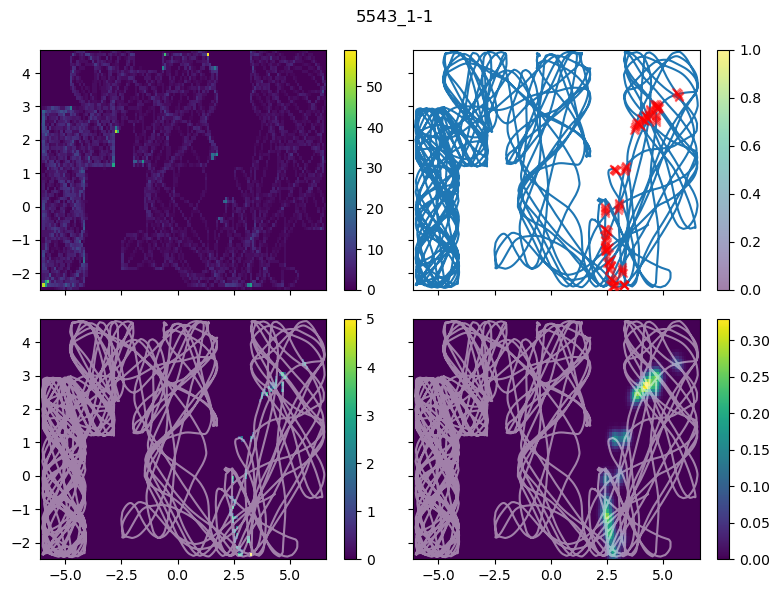

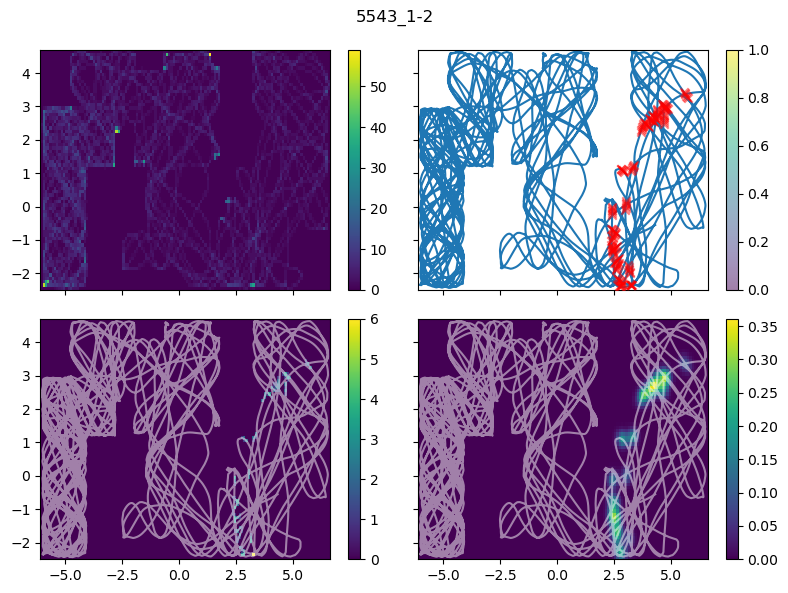

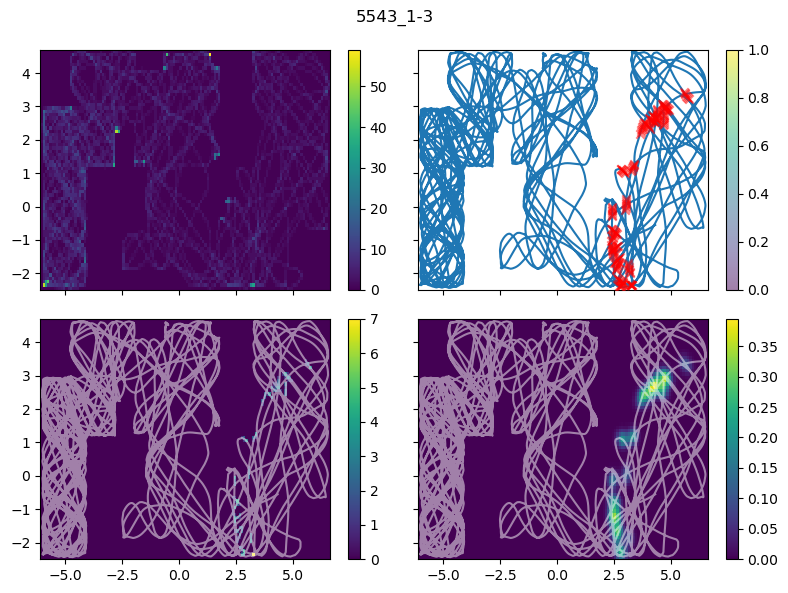

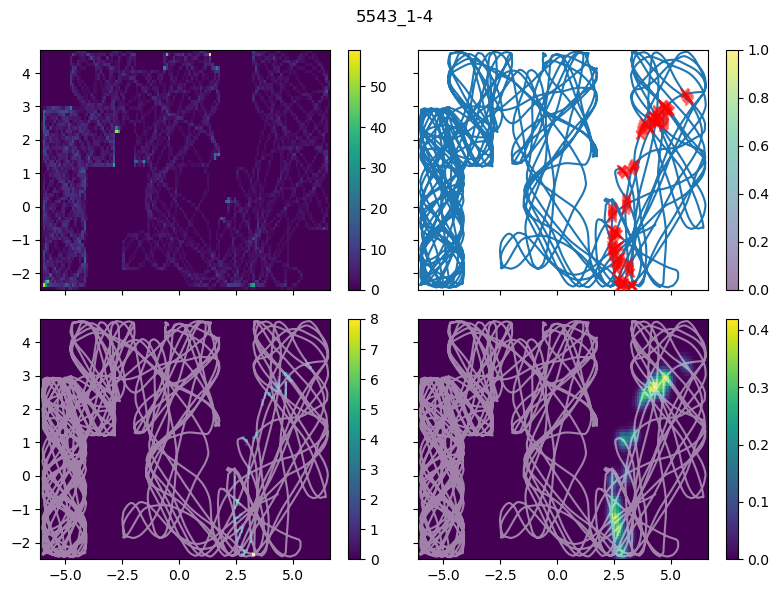

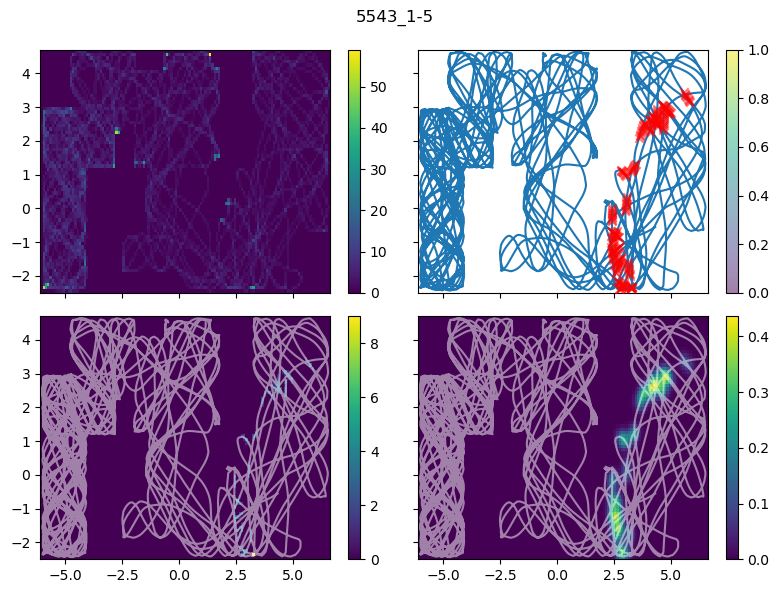

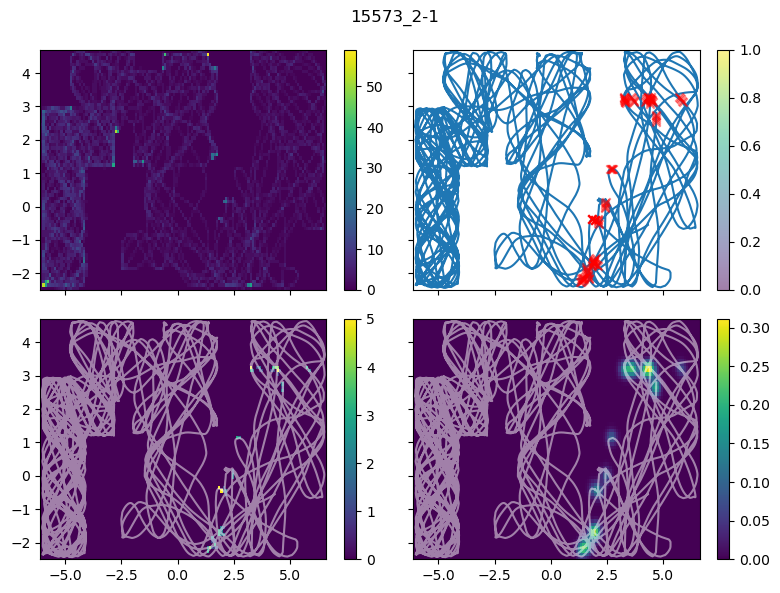

In [59]:

plot_ratemap = True
plot_dir2 = join('plots', project_tag, 'ratemaps2')
os.makedirs(plot_dir2, exist_ok=True)

num_ensem = len(xdict.keys())
id2ensemkey = [ensem_key for ensem_key in xdict.keys()]
ensemkey2id = dict()
for i, ensem_key in enumerate(id2ensemkey):
    ensemkey2id[ensem_key] = i

all_ratemaps = np.zeros((num_ensem, BD.xedm.shape[0], BD.yedm.shape[0]))

for i in tqdm(range(num_ensem)):
    if i >3:
        break
    ensem_key = id2ensemkey[i]
    xsp = xdict[ensem_key]
    ysp = ydict[ensem_key]
    asp = adict[ensem_key]

    spmap, spmap_gau = BD.compute_spikecounts(xsp, ysp)
    Hsp3d, _ = BD.compute_histogram(xsp, ysp, asp)
    Hsp_p = Hsp3d.sum(axis=2)
    Hsp_a = Hsp3d.sum(axis=0).sum(axis=0)

    ratemap_p = BD.compute_ratemap(occ_p, Hsp_p)
    ratemap_a = BD.compute_ratemap(occ_p, Hsp_p)


    ratemap_p = gaussian_filter(ratemap_p, sigma=BD.bodysd_ind, mode='constant', cval=0)

    all_ratemaps[i, :, :] = ratemap_p

    if plot_ratemap:
        fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True, facecolor='w')
        im0 = ax[0, 0].pcolormesh(BD.xedges, BD.yedges, occ.T)
        ax[0, 1].plot(trajdf['x'], trajdf['y'])
        im1 = ax[0, 1].scatter(xsp, ysp, color='r', marker='x', alpha=0.5, zorder=3)
        im2 = ax[1, 0].pcolormesh(BD.xedges, BD.yedges, spmap.T)
        ax[1, 0].plot(trajdf['x'], trajdf['y'], alpha=0.5, color='w')

        im3 = ax[1, 1].pcolormesh(BD.xedges, BD.yedges, ratemap.T)
        ax[1, 1].plot(trajdf['x'], trajdf['y'], alpha=0.5, color='w')
        plt.colorbar(im0, ax=ax[0, 0])
        plt.colorbar(im1, ax=ax[0, 1])
        plt.colorbar(im2, ax=ax[1, 0])
        plt.colorbar(im3, ax=ax[1, 1])
        fig.suptitle('%s'%(ensem_key))
        fig.tight_layout()
        fig.savefig(join(plot_dir, '%d.png'%(i)), dpi=200)
        plt.close(fig)





In [7]:
from scipy.special import factorial

def logPois(r, k, epsilon=1e-6):
    out = k * np.log(r+epsilon) - (r+epsilon) - factorial(k)
    return out

def PBern(p, k):
    return (p**k) * ((1-p) ** (1-k))

def logBern(p, k):
    out = k * np.log(p) + (1-k) * np.log(1-p)
    return out




In [13]:

xML = np.zeros(trajdf.shape[0])
yML = np.zeros(trajdf.shape[0])
np.random.seed(1)
subsampvec = np.random.permutation(num_ensem)

for i in tqdm(range(trajdf.shape[0])):
    f_sigma = trajdf['f_sigma'][i]
    idlist = []
    for nodekey, sigma_list in f_sigma.items():
        for sigma in sigma_list:
            ensem_key = '%s-%d'%(nodekey, sigma)
            ensem_id = ensemkey2id[ensem_key]
            idlist.append(ensem_id)

    act_vec = np.zeros(num_ensem)
    act_vec[idlist] = 1


    # all_ratemaps_epsilon = all_ratemaps + 1e-6
    # k_3d = act_vec.reshape(num_ensem, 1, 1)
    # logL_3d = k_3d * np.log(all_ratemaps_epsilon) - all_ratemaps_epsilon - factorial(k_3d)
    # logL = np.sum(logL_3d, axis=0)

    logL = np.zeros((BD.xedm.shape[0], BD.yedm.shape[0]))
    # for j in subsampvec[:200]:
    for j in range(num_ensem):
        ratemap = all_ratemaps[j]
        k = act_vec[j]
        ratemap_epsilon = ratemap + 1e-6
        out = k * np.log(ratemap_epsilon) - ratemap_epsilon - factorial(k)
        logL += out

    maxid1D_logL = np.argmax(logL)
    maxid2D_logL = np.unravel_index(maxid1D_logL, logL.shape)
    xML[i] = BD.xedm[maxid2D_logL[0]]
    yML[i] = BD.yedm[maxid2D_logL[1]]




100%|██████████| 15343/15343 [24:54<00:00, 10.27it/s]


0.13446254019992793


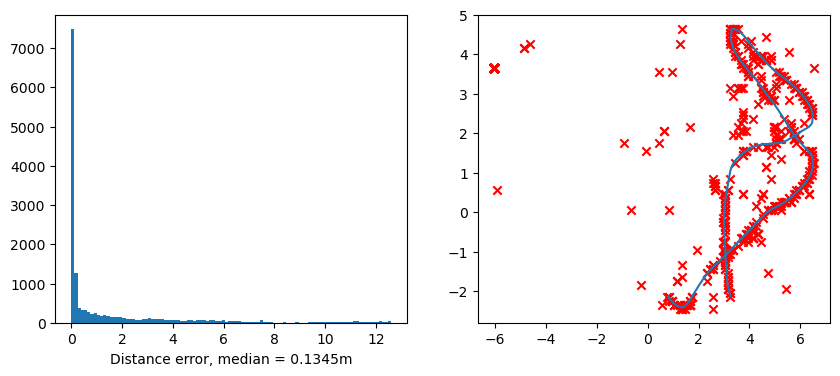

In [33]:
breakind=15342
xgt = trajdf['x'].to_numpy()[:breakind]
ygt = trajdf['y'].to_numpy()[:breakind]
xML = xML[:breakind]
yML = yML[:breakind]
mse = np.sqrt((xML - xgt)**2 + (yML - ygt)**2)
print(np.median(mse))
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(mse, bins=100)

breakind1 = 10000
ax[0].set_xlabel('Distance error, median = %0.4fm'  %np.median(mse))
ax[1].plot(xgt[breakind1:breakind1 + 500], ygt[breakind1:breakind1 + 500])
ax[1].scatter(xML[breakind1:breakind1 + 500], yML[breakind1:breakind1 + 500], color='r', marker='x')

In [57]:
type(all_ratemaps)

# Boundary Effect Investigation

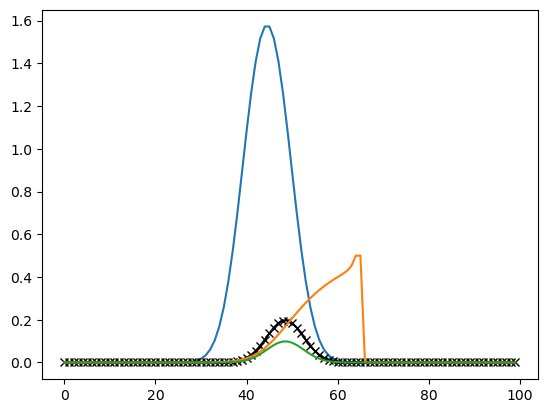

In [62]:
from scipy.ndimage import gaussian_filter1d


foox = np.zeros(100)
foox1 = foox.copy()
foox1[40:50] = 2
foox2 = foox.copy()
foox2[48:50] = 1
foox3 = divide_ignore(foox2, foox1)


foosd = 4

foo1 = gaussian_filter1d(foox1, sigma=foosd)
foo2 = gaussian_filter1d(foox2, sigma=foosd)
foo3 = divide_ignore(foo2, foo1)
plt.plot(foo1)
plt.plot(foo2, marker='x', color='k')
plt.plot(foo3)
plt.plot(gaussian_filter1d(foox3, sigma=foosd))


1.0


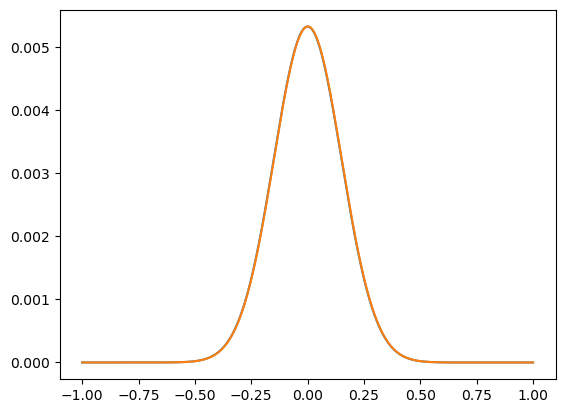

In [75]:

fiox = np.linspace(-1, 1, 1000)
fiodx = fiox[1]- fiox[0]

fiosd = 0.15
fioy = np.exp(np.square(fiox/fiosd) / -2) / (fiosd * np.sqrt(2*np.pi))
plt.plot(fiox, fioy * fiodx)


fiosd_ind = fiosd/fiodx
fiox_ind = np.zeros(fiox.shape[0])
fiox_ind[500] = 1
fioy_gau = gaussian_filter1d(fiox_ind, sigma=fiosd_ind)
plt.plot(fiox, fioy_gau)
print(fioy_gau.sum())


In [74]:
fiodx

0.002002002002001957